In [31]:
from gensim.models import Word2Vec
from gensim.utils import tokenize
from gensim.parsing.preprocessing import remove_stopwords

s1 = "CNN is great. "
s2 = 'Python is a good language. '
s3 = 'You can learn CNN using Python. '
doc = s1 + s2 + s3
doc

'CNN is great. Python is a good language. You can learn CNN using Python. '

In [32]:
doc = remove_stopwords(doc)
doc

'CNN great. Python good language. You learn CNN Python.'

In [33]:
tk_doc = [list(tokenize(doc, deacc=True))]
tk_doc

[['CNN',
  'great',
  'Python',
  'good',
  'language',
  'You',
  'learn',
  'CNN',
  'Python']]

# Training

In [34]:
#(input_doc, vector_size, window คือจำนวนคำข้างเคียง, 
#min_count คือ จำนวนคำที่นำมาคิด เช่น ถ้า 2 = ถ้าคำนั้นอยู่ในประโยคแค่ 1 คำจะไม่นำมาประมวล,
#workers คือ จำนวน Thread ที่จะรันระหว่างการ Training,
#sg คือ วิธีที่จะใช้ sg=1 คือ CBOW, sg=0 คือ Skip-gram, epochs to train)

model = Word2Vec(tk_doc, vector_size=5, window=1, min_count=1, sg=0, workers=4, epochs=50)
print(model)

Word2Vec(vocab=7, vector_size=5, alpha=0.025)


In [35]:
#check what words that model contains
for index, word in enumerate(model.wv.index_to_key):
    print(index, word)

0 Python
1 CNN
2 learn
3 You
4 language
5 good
6 great


In [36]:
#find similarity
model.wv.most_similar('good')

[('great', 0.932443380355835),
 ('CNN', 0.7744607925415039),
 ('You', 0.7672737240791321),
 ('Python', 0.0001095528932637535),
 ('language', -0.1528887301683426),
 ('learn', -0.6138823628425598)]

# Plot to explore the vectors
because it's 5 of vector size, so PCA to 2 before plotting

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

labels = np.asarray(model.wv.index_to_key)
print(labels)
labels.shape

['Python' 'CNN' 'learn' 'You' 'language' 'good' 'great']


(7,)

In [41]:
vectors = np.asarray(model.wv.vectors)
vectors.shape

(7, 5)

In [42]:
pd.DataFrame(vectors, index=labels, columns=None)

,0,1,2,3,4
Python,-0.010832,0.004699,0.102231,0.180137,-0.186146
CNN,-0.142510,0.129310,0.179744,-0.100395,-0.075400
learn,0.147483,-0.030526,-0.090519,0.130974,-0.097297
You,-0.036443,0.057630,0.019984,-0.165826,-0.189044
language,0.146156,0.101447,0.135307,0.015251,0.126936
good,-0.068186,-0.018861,0.115460,-0.150512,-0.078786
great,-0.150230,-0.018602,0.190760,-0.146382,-0.046674


In [43]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_dim = pca.fit_transform(vectors)
pd.DataFrame(reduced_dim, index=labels, columns=None)

,0,1
Python,0.150366,-0.113411
CNN,-0.162506,0.021170
learn,0.287608,-0.055602
You,-0.081777,-0.105564
language,0.114512,0.252525
good,-0.117247,-0.012159
great,-0.190955,0.013041


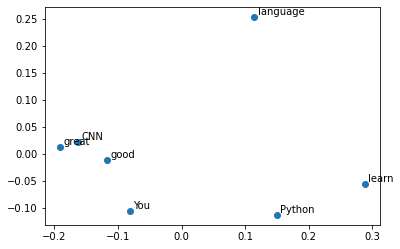

In [45]:
plt.scatter(reduced_dim[:, 0], reduced_dim[:, 1])
for i, label in enumerate(labels):
    plt.annotate(label, xy=(reduced_dim[i, 0]+0.005, reduced_dim[i, 1]+0.005))
plt.show()

In [46]:
model.save('testWord2Vec.model')

In [47]:
trained_model = Word2Vec.load('testWord2Vec.model')
trained_model.wv.most_similar('good')

[('great', 0.932443380355835),
 ('CNN', 0.7744607925415039),
 ('You', 0.7672737240791321),
 ('Python', 0.0001095528932637535),
 ('language', -0.1528887301683426),
 ('learn', -0.6138823628425598)]